In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [6]:
# Load data
df = pd.read_csv('/content/customers.csv')

# Display the first few rows to understand the structure
print(df.head())


  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053     10/1/94          F   JAMSHEDPUR   
1            T2   C2142763      4/4/57          M      JHAJJAR   
2            T3   C4417068    26/11/96          F       MUMBAI   
3            T4   C5342380     14/9/73          F       MUMBAI   
4            T5   C9031234     24/3/88          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16         143207.0   
1             2270.69          2/8/16         141858.0   
2            17874.44          2/8/16         142712.0   
3           866503.21          2/8/16         142714.0   
4             6714.43          2/8/16         181156.0   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0  
3                   2060.0  
4                   1762.5  


In [7]:
# Select relevant features
features = ['CustAccountBalance', 'TransactionAmount (INR)']

# Drop rows with missing values if any
df = df.dropna()

# Extract features
X = df[features]


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

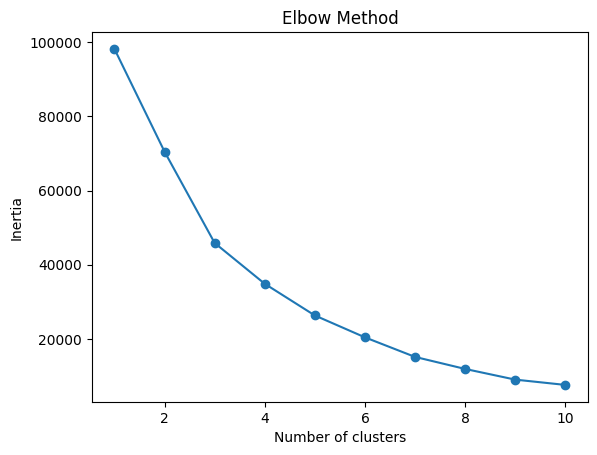

In [9]:
# Function to plot inertia (sum of squared distances of samples to their closest cluster center)
def plot_inertia(data, max_clusters=10):
    inertias = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

# Plot inertia to find optimal k
plot_inertia(X_scaled)


In [10]:
# Choose K (e.g., from elbow method, let's say K=3)
k = 3

# Train the K-means model
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels back to the original DataFrame
df['Cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
# Group by cluster and calculate mean values for interpretation
cluster_means = df.groupby('Cluster')[features].mean()
print(cluster_means)


         CustAccountBalance  TransactionAmount (INR)
Cluster                                             
0              1.061031e+05              1220.802676
1              2.848378e+05             63770.164281
2              3.035138e+07              6625.263333


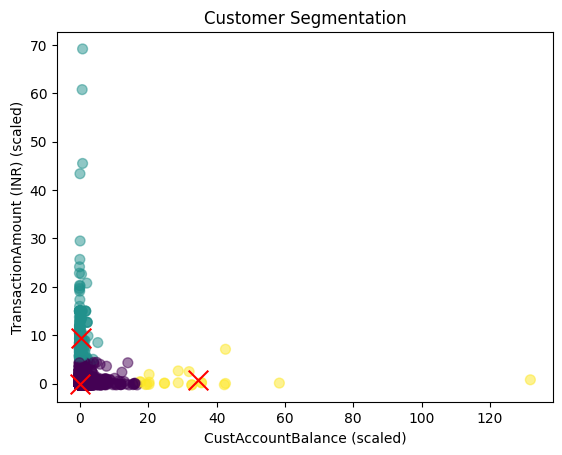

In [12]:
# Scatter plot of the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200)
plt.xlabel('CustAccountBalance (scaled)')
plt.ylabel('TransactionAmount (INR) (scaled)')
plt.title('Customer Segmentation')
plt.show()


In [13]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.9522318055687601


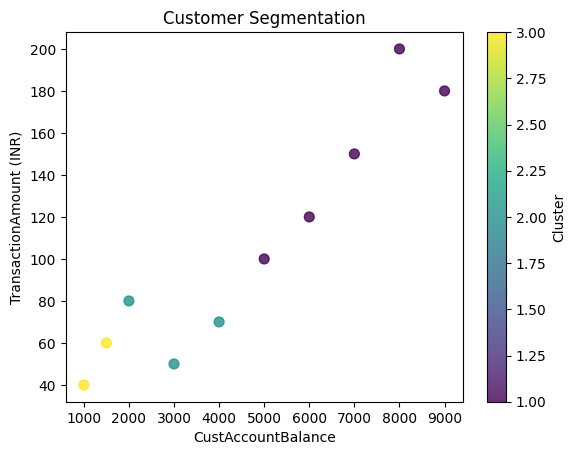

In [16]:
import matplotlib.pyplot as plt

plt.scatter(df['CustAccountBalance'], df['TransactionAmount (INR)'], c=df['Cluster'], cmap='viridis', s=50, alpha=0.8)
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.title('Customer Segmentation')
plt.colorbar(label='Cluster')
plt.show()
